In [56]:
import pandas as pd

tf_mini_df = pd.read_csv("tf_mini.csv")
log_mini_df = pd.read_csv("log_mini.csv")

tf_mini_head = tf_mini_df.head()
log_mini_head = log_mini_df.head()

(tf_mini_head, log_mini_head)


(                                 track_id    duration  release_year  \
 0  t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
 1  t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
 2  t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
 3  t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
 4  t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   
 
    us_popularity_estimate  acousticness  beat_strength  bounciness  \
 0               99.975414      0.458040       0.519497    0.504949   
 1               99.969430      0.916272       0.419223    0.545530   
 2               99.602549      0.812884       0.425890    0.508280   
 3               99.665018      0.396854       0.400934    0.359990   
 4               99.991764      0.728831       0.371328    0.335115   
 
    danceability  dyn_range_mean    energy  ...  time_signature   valence  \
 0      0.399767        7.511880  0.817709  ...              

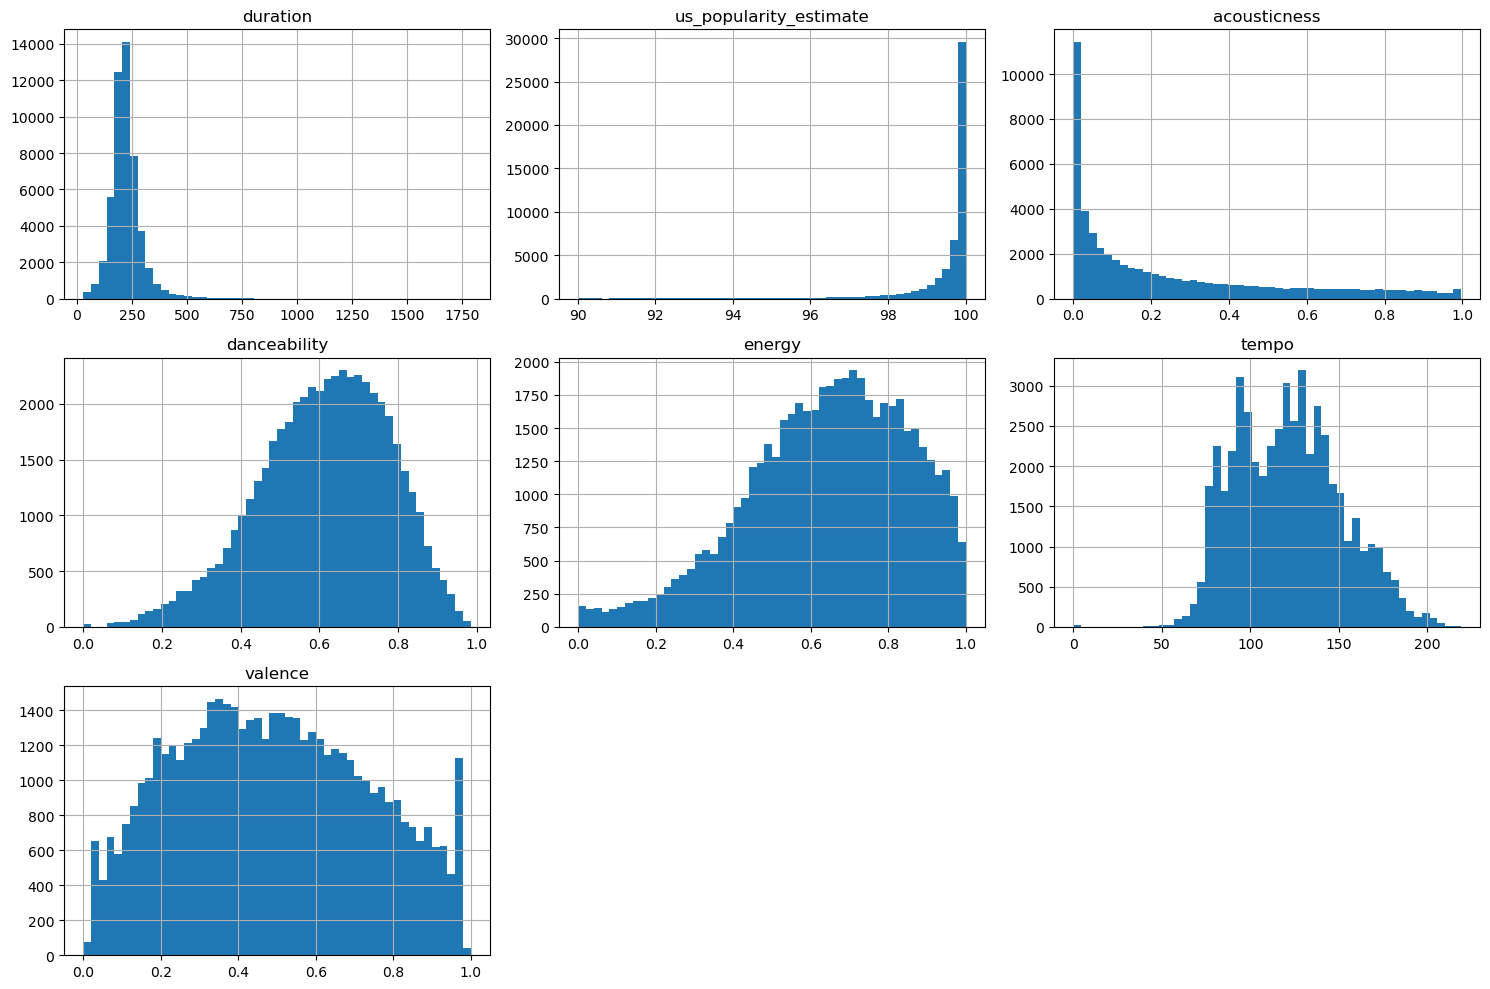

In [57]:
import matplotlib.pyplot as plt

numerical_features_tf_mini = ['duration', 'us_popularity_estimate', 'acousticness', 'danceability', 'energy', 'tempo', 'valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_tf_mini, 1):
    plt.subplot(3, 3, i)
    tf_mini_df[feature].hist(bins=50)
    plt.title(feature)

plt.tight_layout()
plt.show()

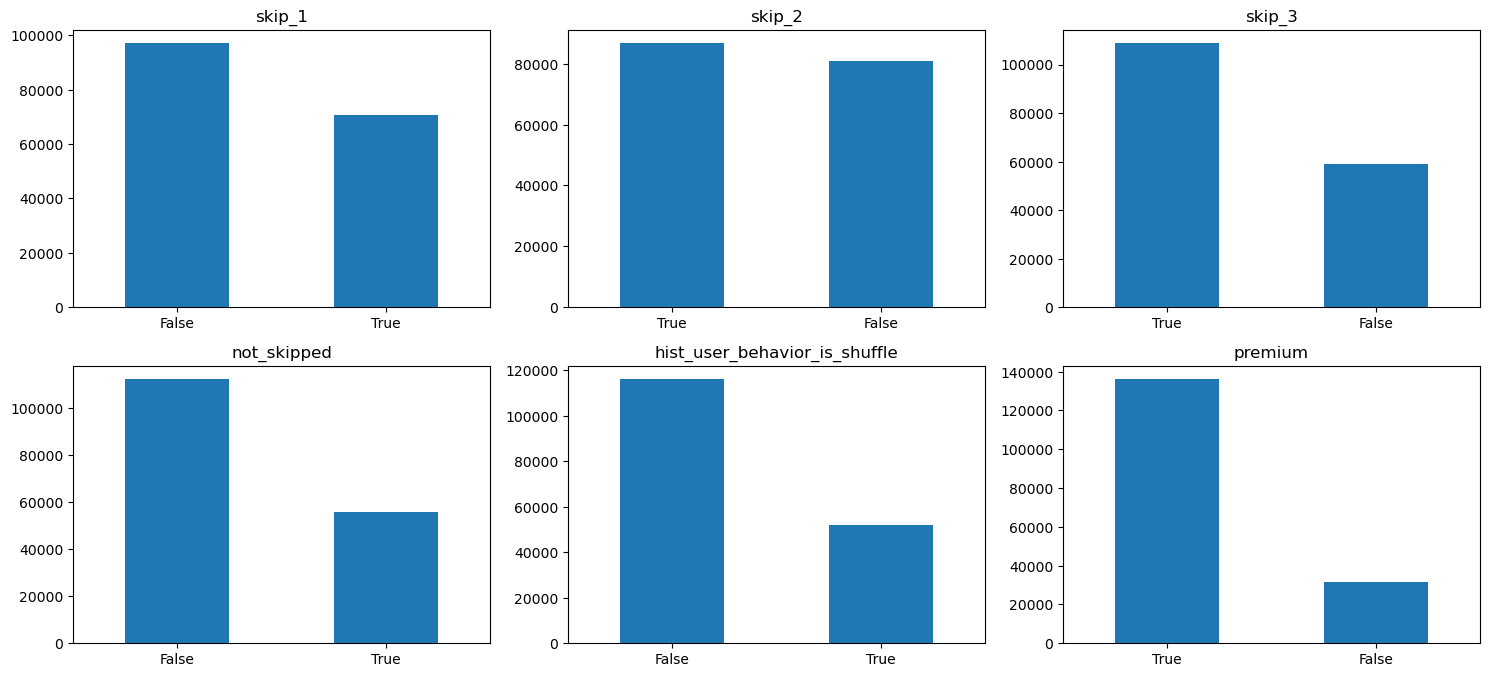

In [58]:
boolean_features_log_mini = [col for col in log_mini_df.columns if log_mini_df[col].dtype == 'bool']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(boolean_features_log_mini, 1):
    plt.subplot(3, 3, i)
    log_mini_df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

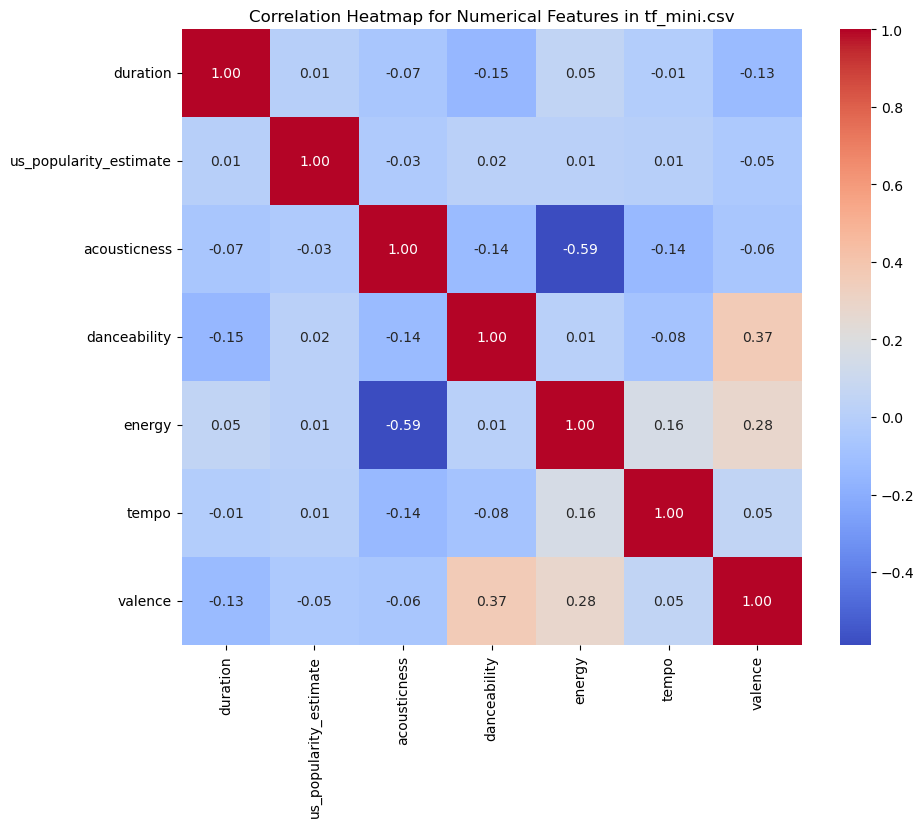

In [59]:
import seaborn as sns

correlation_matrix = tf_mini_df[numerical_features_tf_mini].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features in tf_mini.csv')
plt.show()

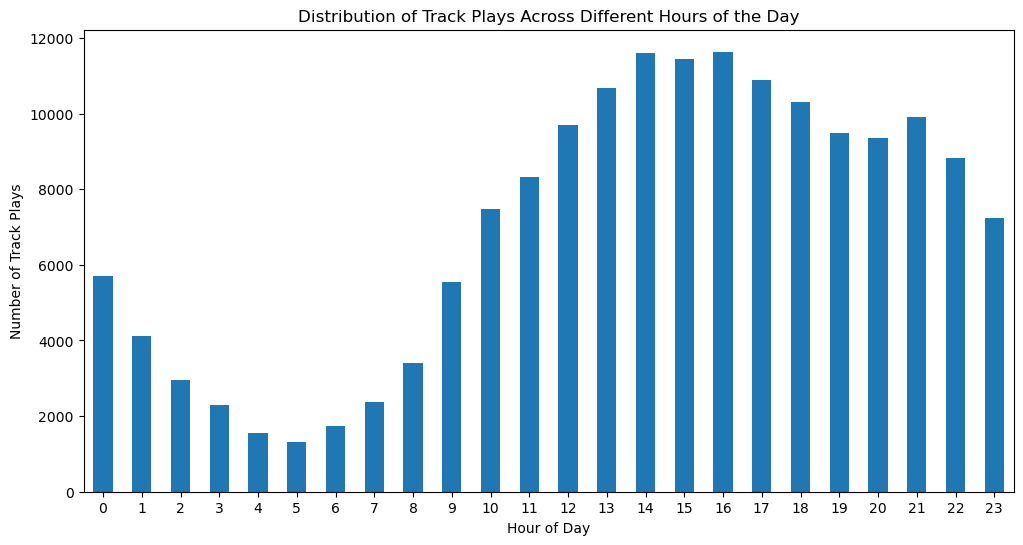

In [60]:
hourly_distribution = log_mini_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar')
plt.title('Distribution of Track Plays Across Different Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Track Plays')
plt.xticks(rotation=0)
plt.show()

In [61]:
skip_columns = ['skip_1', 'skip_2', 'skip_3', 'not_skipped']
premium_skipping_rates = log_mini_df.groupby('premium')[skip_columns].mean()

context_skipping_rates = log_mini_df.groupby('context_type')[skip_columns].mean().sort_values(by='not_skipped', ascending=False)

(premium_skipping_rates, context_skipping_rates)

(           skip_1    skip_2    skip_3  not_skipped
 premium                                           
 False    0.449147  0.533761  0.652936     0.330254
 True     0.415037  0.513300  0.647314     0.333495,
                          skip_1    skip_2    skip_3  not_skipped
 context_type                                                    
 catalog                0.345059  0.456525  0.609309     0.371063
 personalized_playlist  0.331989  0.452285  0.632392     0.350470
 editorial_playlist     0.402490  0.508174  0.640131     0.341839
 user_collection        0.469109  0.546404  0.664022     0.316091
 radio                  0.449282  0.553750  0.681196     0.303454
 charts                 0.451454  0.555100  0.684965     0.300287)

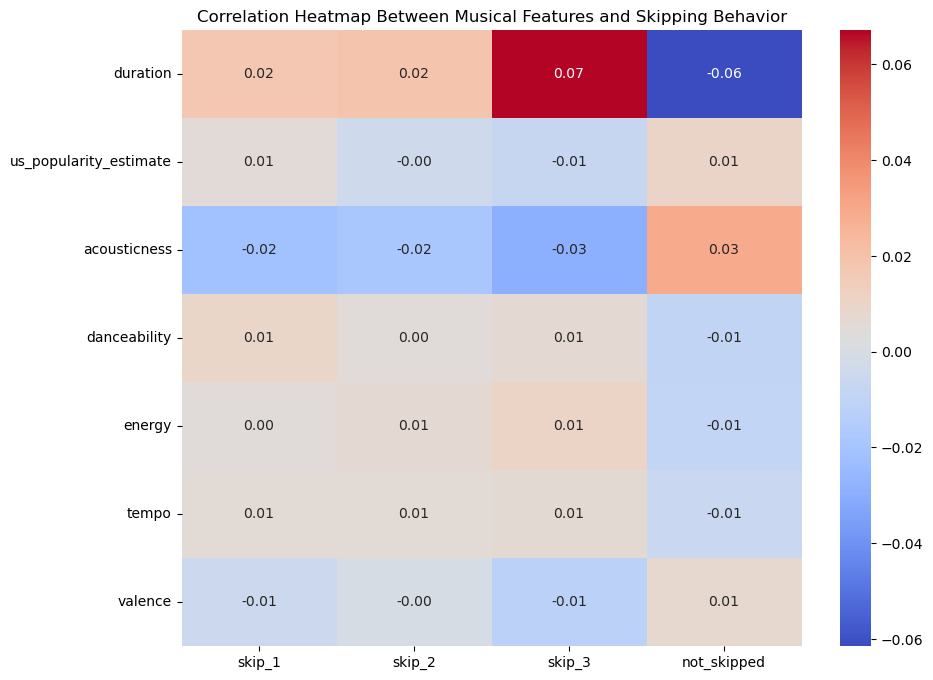

In [62]:
merged_df = pd.merge(
    left=log_mini_df,
    right=tf_mini_df,
    how='left',
    left_on='track_id_clean',
    right_on='track_id'
)

merged_df.drop(columns=['track_id_clean', 'track_id'], inplace=True)

musical_features = numerical_features_tf_mini
skip_behaviors = ['skip_1', 'skip_2', 'skip_3', 'not_skipped']

skip_correlation_matrix = merged_df[musical_features + skip_behaviors].corr().loc[musical_features, skip_behaviors]

plt.figure(figsize=(10, 8))
sns.heatmap(skip_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap Between Musical Features and Skipping Behavior')
plt.show()